# Age Salary Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

##### Reading dataset

In [2]:
salary_df = pd.read_csv('dataset/salary.csv')

In [3]:
salary_df.head()

,age,salary
0,17.0,500
1,17.5,700
2,18.0,1000
3,19.0,900
4,19.5,1200


##### Creating explicative (x) and target (y) variables

In [4]:
x = salary_df[['age']]
y = salary_df[['salary']]

In [5]:
corr = salary_df.corr()
corr

,age,salary
age,1.000000,0.959747
salary,0.959747,1.000000


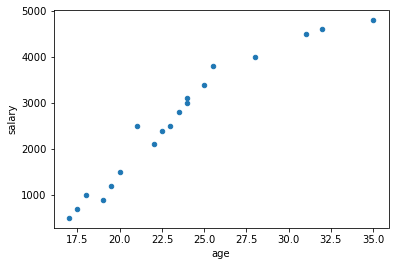

In [6]:
salary_df.plot.scatter('age', 'salary')

### Linear Regression
$y = mx + b$

##### Training the linear regressor

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'salary')

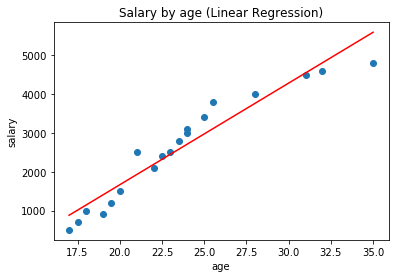

In [8]:
plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='red')
plt.title('Salary by age (Linear Regression)')
plt.xlabel('age')
plt.ylabel('salary')

In [9]:
#m
linear_regressor.coef_

array([[262.08813481]])

In [10]:
#b
linear_regressor.intercept_

array([-3578.12843824])

In [11]:
linear_regressor.coef_*40 + linear_regressor.intercept_

array([[6905.39695408]])

In [12]:
linear_regressor.predict([[40]])

array([[6905.39695408]])

In [13]:
linear_regressor.score(x, y)

0.9211142243680523

### Polynomial Regression
$ y = b_{0} + b_{1}x{1} + b_{2}x{1}^2 + ... + b_{m}x_{1}^m + c_{0} + c_{1}x{n} + c_{2}x{n}^2 + ... + c_{m}x_{n}^m $

##### Creating Polynomial Features to solve Polynomial Regression as a Multiple Linear Regression:

$ y = m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n} $

In [14]:
polynomial_transformer = PolynomialFeatures(degree=2)
x_polynomial = polynomial_transformer.fit_transform(x)

##### Training the polynomial regressor

In [15]:
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(x_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'salary')

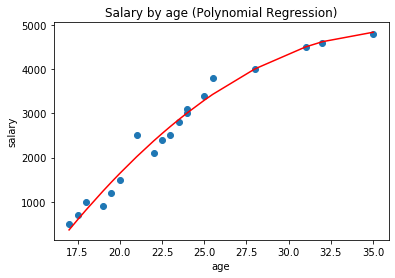

In [16]:
plt.scatter(x, y)
plt.plot(x, polynomial_regressor.predict(x_polynomial), color='red')
plt.title('Salary by age (Polynomial Regression)')
plt.xlabel('age')
plt.ylabel('salary')

In [17]:
polynomial_value = polynomial_transformer.transform([[40]])
polynomial_regressor.predict(polynomial_value)

array([[4721.68368939]])

In [18]:
polynomial_regressor.score(x_polynomial, y)

0.9767284598670797